# Bike Sharing Analysis 
## Ford GoBike Data

Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate, in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. In this project, I will perform an exploatory analysis on data provided by Ford Go Bike, a bike-share system provider taken in from 2018 June to 2019 June. Source: https://s3.amazonaws.com/baywheels-data/index.html

In [3]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import glob
import os
import subprocess
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [4]:

df = pd.read_csv(r"C:\Users\cryst\Downloads\201806-fordgobike-tripdata.csv")
df1 = pd.read_csv(r"C:\Users\cryst\Downloads\201810-fordgobike-tripdata.csv")
df2 = pd.read_csv(r"C:\Users\cryst\Downloads\201811-fordgobike-tripdata.csv")
df3 = pd.read_csv(r"C:\Users\cryst\Downloads\201812-fordgobike-tripdata.csv")
df4 = pd.read_csv(r"C:\Users\cryst\Downloads\201901-fordgobike-tripdata.csv")
df5 = pd.read_csv(r"C:\Users\cryst\Downloads\201902-fordgobike-tripdata.csv")
df6 = pd.read_csv(r"C:\Users\cryst\Downloads\201903-fordgobike-tripdata.csv")
df7 = pd.read_csv(r"C:\Users\cryst\Downloads\201905-baywheels-tripdata.csv")
df8 = pd.read_csv(r"C:\Users\cryst\Downloads\201906-baywheels-tripdata.csv")


In [5]:
df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8], sort=True)

In [6]:
# df.to_csv('./fordobike.csv')

# Part II - Assessing Data 

In [7]:
list(df)

['bike_id',
 'bike_share_for_all_trip',
 'duration_sec',
 'end_station_id',
 'end_station_latitude',
 'end_station_longitude',
 'end_station_name',
 'end_time',
 'member_birth_year',
 'member_gender',
 'rental_access_method',
 'start_station_id',
 'start_station_latitude',
 'start_station_longitude',
 'start_station_name',
 'start_time',
 'user_type']

In [8]:
df.shape

(1668652, 17)

In [9]:
# Only users whose genders are known.
df = df[df.member_gender.isin(['Male', 'Female'])]
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,2100,Yes,59088,95.0,37.766219,-122.431060,Sanchez St at 15th St,2018-07-01 15:57:33.3160,1975.0,Male,NaN,76.0,37.771662,-122.422423,McCoppin St at Valencia St,2018-06-30 23:32:44.6590,Subscriber
2,3235,No,63654,50.0,37.780526,-122.390288,2nd St at Townsend St,2018-07-01 14:07:47.2320,1962.0,Female,NaN,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2018-06-30 20:26:53.0310,Subscriber
3,3675,No,50508,88.0,37.770030,-122.411726,11th St at Bryant St,2018-07-01 10:31:48.2500,1992.0,Male,NaN,58.0,37.776619,-122.417385,Market St at 10th St,2018-06-30 20:29:59.8130,Subscriber
4,3232,No,51697,272.0,37.850578,-122.278175,Woolsey St at Sacramento St,2018-07-01 08:46:33.7390,1989.0,Female,NaN,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2018-06-30 18:24:56.6960,Customer
7,779,No,7224,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-07-01 01:01:24.4330,1989.0,Male,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-06-30 23:01:00.4000,Subscriber


In [10]:
df.sample(50)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
156285,2794,Yes,450,357.0,37.341132,-121.892844,2nd St at Julian St,2018-10-07 19:07:01.6940,1992.0,Female,NaN,275.0,37.342997,-121.888889,Julian St at 6th St,2018-10-07 18:59:30.9010,Subscriber
242334,5659,No,387,372.0,37.804037,-122.262409,Madison St at 17th St,2019-03-03 14:35:20.8170,1985.0,Female,NaN,193.0,37.812744,-122.247215,Grand Ave at Santa Clara Ave,2019-03-03 14:28:53.6740,Subscriber
53577,1619,No,774,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-11-15 07:46:48.0560,1985.0,Male,NaN,92.0,37.772301,-122.393028,Mission Bay Kids Park,2018-11-15 07:33:53.2290,Subscriber
21018,4370,No,826,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2019-01-29 18:15:00.9760,1989.0,Male,NaN,90.0,37.771058,-122.402717,Townsend St at 7th St,2019-01-29 18:01:14.1280,Subscriber
103353,1821,No,1522,365.0,37.780450,-122.431946,Turk St at Fillmore St,2019-05-13 18:01:40.7120,1964.0,Male,NaN,17.0,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2019-05-13 17:36:18.6570,Customer
42987,793,No,806,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2018-10-25 07:49:37.1150,1990.0,Female,NaN,90.0,37.771058,-122.402717,Townsend St at 7th St,2018-10-25 07:36:11.0990,Subscriber
97981,71,Yes,371,286.0,37.336466,-121.876613,San Carlos St at 11th St,2018-12-08 00:49:36.1990,1965.0,Male,NaN,318.0,37.330698,-121.888979,San Carlos St at Market St,2018-12-08 00:43:24.5580,Subscriber
96111,1980,No,666,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2018-10-16 20:35:21.8750,1971.0,Male,NaN,338.0,37.803189,-122.270579,13th St at Franklin St,2018-10-16 20:24:15.1100,Subscriber
48741,2262,No,861,74.0,37.776435,-122.426244,Laguna St at Hayes St,2018-11-16 00:39:56.4480,1995.0,Male,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-11-16 00:25:35.1650,Subscriber
176666,3320,No,846,112.0,37.763847,-122.413004,Harrison St at 17th St,2019-05-01 17:50:00.4670,1989.0,Male,NaN,81.0,37.775880,-122.393170,Berry St at 4th St,2019-05-01 17:35:54.4220,Subscriber


In [11]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549180 entries, 0 to 187878
Data columns (total 17 columns):
bike_id                    1549180 non-null int64
bike_share_for_all_trip    1549180 non-null object
duration_sec               1549180 non-null int64
end_station_id             1544634 non-null float64
end_station_latitude       1549180 non-null float64
end_station_longitude      1549180 non-null float64
end_station_name           1544634 non-null object
end_time                   1549180 non-null object
member_birth_year          1549117 non-null float64
member_gender              1549180 non-null object
rental_access_method       0 non-null object
start_station_id           1544634 non-null float64
start_station_latitude     1549180 non-null float64
start_station_longitude    1549180 non-null float64
start_station_name         1544634 non-null object
start_time                 1549180 non-null object
user_type                  1549180 non-null object
dtypes: float64(7), in

In [12]:
df.duplicated().sum()

0

# Part III - Cleaning Data 

In [13]:
df_clean = df.copy()

In [14]:
#Convert time columns to datetime 
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)
df = df.sort_values(by='start_time')

In [15]:
df['duration_sec'].describe()

count    1.549180e+06
mean     7.505020e+02
std      1.720704e+03
min      6.100000e+01
25%      3.410000e+02
50%      5.400000e+02
75%      8.370000e+02
max      8.620500e+04
Name: duration_sec, dtype: float64

In [16]:
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [17]:
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

In [18]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549180 entries, 0 to 187878
Data columns (total 17 columns):
bike_id                    1549180 non-null object
bike_share_for_all_trip    1549180 non-null category
duration_sec               1549180 non-null int64
end_station_id             1549180 non-null object
end_station_latitude       1549180 non-null float64
end_station_longitude      1549180 non-null float64
end_station_name           1544634 non-null object
end_time                   1549180 non-null datetime64[ns]
member_birth_year          1549117 non-null float64
member_gender              1549180 non-null category
rental_access_method       0 non-null object
start_station_id           1549180 non-null object
start_station_latitude     1549180 non-null float64
start_station_longitude    1549180 non-null float64
start_station_name         1544634 non-null object
start_time                 1549180 non-null datetime64[ns]
user_type                  1549180 non-null category
d

In [20]:
df_clean.head(20)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
0,2100,Yes,59088,2100,37.766219,-122.431060,Sanchez St at 15th St,2018-07-01 15:57:33.316,1975.0,Male,NaN,2100,37.771662,-122.422423,McCoppin St at Valencia St,2018-06-30 23:32:44.659,Subscriber,44.0
2,3235,No,63654,3235,37.780526,-122.390288,2nd St at Townsend St,2018-07-01 14:07:47.232,1962.0,Female,NaN,3235,37.791464,-122.391034,The Embarcadero at Steuart St,2018-06-30 20:26:53.031,Subscriber,57.0
3,3675,No,50508,3675,37.770030,-122.411726,11th St at Bryant St,2018-07-01 10:31:48.250,1992.0,Male,NaN,3675,37.776619,-122.417385,Market St at 10th St,2018-06-30 20:29:59.813,Subscriber,27.0
4,3232,No,51697,3232,37.850578,-122.278175,Woolsey St at Sacramento St,2018-07-01 08:46:33.739,1989.0,Female,NaN,3232,37.808894,-122.256460,Grand Ave at Perkins St,2018-06-30 18:24:56.696,Customer,30.0
7,779,No,7224,779,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-07-01 01:01:24.433,1989.0,Male,NaN,779,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-06-30 23:01:00.400,Subscriber,30.0
8,2491,Yes,4294,2491,37.866043,-122.258804,Haste St at Telegraph Ave,2018-07-01 00:43:38.083,1996.0,Female,NaN,2491,37.866043,-122.258804,Haste St at Telegraph Ave,2018-06-30 23:32:03.706,Subscriber,23.0
9,4225,Yes,2209,4225,37.777053,-122.429558,Webster St at Grove St,2018-07-01 00:32:02.304,1963.0,Male,NaN,4225,37.755213,-122.420975,Valencia St at 22nd St,2018-06-30 23:55:13.210,Subscriber,56.0
10,3972,No,8975,3972,37.773793,-122.421239,Market St at Franklin St,2018-07-01 00:26:06.718,1981.0,Male,NaN,3972,37.773793,-122.421239,Market St at Franklin St,2018-06-30 21:56:30.967,Subscriber,38.0
11,3369,No,7256,3369,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-07-01 00:17:59.797,1990.0,Male,NaN,3369,37.804770,-122.403234,The Embarcadero at Sansome St,2018-06-30 22:17:03.129,Customer,29.0
13,1622,No,922,1622,37.866043,-122.258804,Haste St at Telegraph Ave,2018-07-01 00:13:30.863,1992.0,Male,NaN,1622,37.851376,-122.252523,College Ave at Alcatraz Ave,2018-06-30 23:58:08.188,Subscriber,27.0


In [21]:
# extract start time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')

In [22]:
# extract start time month number
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

In [23]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [24]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

In [25]:
df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_hour
0,2100,Yes,59088,2100,37.766219,-122.431060,Sanchez St at 15th St,2018-07-01 15:57:33.316,1975.0,Male,...,37.771662,-122.422423,McCoppin St at Valencia St,2018-06-30 23:32:44.659,Subscriber,44.0,June,6,Sat,23
2,3235,No,63654,3235,37.780526,-122.390288,2nd St at Townsend St,2018-07-01 14:07:47.232,1962.0,Female,...,37.791464,-122.391034,The Embarcadero at Steuart St,2018-06-30 20:26:53.031,Subscriber,57.0,June,6,Sat,20
3,3675,No,50508,3675,37.770030,-122.411726,11th St at Bryant St,2018-07-01 10:31:48.250,1992.0,Male,...,37.776619,-122.417385,Market St at 10th St,2018-06-30 20:29:59.813,Subscriber,27.0,June,6,Sat,20
4,3232,No,51697,3232,37.850578,-122.278175,Woolsey St at Sacramento St,2018-07-01 08:46:33.739,1989.0,Female,...,37.808894,-122.256460,Grand Ave at Perkins St,2018-06-30 18:24:56.696,Customer,30.0,June,6,Sat,18
7,779,No,7224,779,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-07-01 01:01:24.433,1989.0,Male,...,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-06-30 23:01:00.400,Subscriber,30.0,June,6,Sat,23


In [26]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549180 entries, 0 to 187878
Data columns (total 22 columns):
bike_id                    1549180 non-null object
bike_share_for_all_trip    1549180 non-null category
duration_sec               1549180 non-null int64
end_station_id             1549180 non-null object
end_station_latitude       1549180 non-null float64
end_station_longitude      1549180 non-null float64
end_station_name           1544634 non-null object
end_time                   1549180 non-null datetime64[ns]
member_birth_year          1549117 non-null float64
member_gender              1549180 non-null category
rental_access_method       0 non-null object
start_station_id           1549180 non-null object
start_station_latitude     1549180 non-null float64
start_station_longitude    1549180 non-null float64
start_station_name         1544634 non-null object
start_time                 1549180 non-null datetime64[ns]
user_type                  1549180 non-null category
m

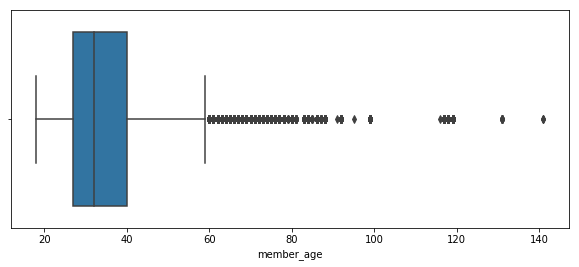

In [27]:
# code for the age boxplot

plt.figure(figsize = [10, 4])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [19]:
# substract the birth year from the current year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

In [28]:
df_clean.member_age.mean()

34.74591396259934

In [66]:
df['member_age'] = 2019-df['member_birth_year']

In [67]:
# Check age distrubition
df['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    1.549117e+06
mean     3.474591e+01
std      1.022735e+01
min      1.800000e+01
10%      2.400000e+01
20%      2.600000e+01
30%      2.800000e+01
40%      3.000000e+01
50%      3.200000e+01
60%      3.500000e+01
70%      3.800000e+01
75%      4.000000e+01
80%      4.200000e+01
90%      5.000000e+01
95%      5.500000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [29]:
df_clean.member_age.describe(percentiles = [ .95])

count    1.549117e+06
mean     3.474591e+01
std      1.022735e+01
min      1.800000e+01
50%      3.200000e+01
95%      5.500000e+01
max      1.410000e+02
Name: member_age, dtype: float64

Since the age over 60 are the outliers, I will drop ages over 60 and keep only ages under 60. 

In [68]:
#Generate a new field for member age group from member_age_bin
df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [30]:
df_clean = df_clean.query('member_age <=60')

In [31]:
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

In [32]:
df_clean.describe()

,duration_sec,end_station_latitude,end_station_longitude,member_birth_year,start_station_latitude,start_station_longitude,member_age,start_time_month,start_time_hour
count,1.515445e+06,1.515445e+06,1.515445e+06,1.515445e+06,1.515445e+06,1.515445e+06,1.515445e+06,1.515445e+06,1.515445e+06
mean,7.496013e+02,3.776835e+01,-1.223509e+02,1.984964e+03,3.776822e+01,-1.223514e+02,3.403578e+01,5.783219e+00,1.352395e+01
std,1.720135e+03,1.035826e-01,1.558070e-01,9.050938e+00,1.037016e-01,1.562224e-01,9.050938e+00,3.607676e+00,4.802295e+00
min,6.100000e+01,3.731128e+01,-1.224537e+02,1.959000e+03,3.731128e+01,-1.224537e+02,1.800000e+01,1.000000e+00,0.000000e+00
25%,3.410000e+02,3.777041e+01,-1.224113e+02,1.980000e+03,3.777041e+01,-1.224117e+02,2.700000e+01,3.000000e+00,9.000000e+00
50%,5.400000e+02,3.778101e+01,-1.223971e+02,1.987000e+03,3.778076e+01,-1.223983e+02,3.200000e+01,6.000000e+00,1.400000e+01
75%,8.360000e+02,3.779625e+01,-1.222914e+02,1.992000e+03,3.779539e+01,-1.222902e+02,3.900000e+01,1.000000e+01,1.700000e+01
max,8.620500e+04,4.551000e+01,-7.357000e+01,2.001000e+03,4.551000e+01,-7.357000e+01,6.000000e+01,1.200000e+01,2.300000e+01


In [33]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515445 entries, 0 to 187878
Data columns (total 22 columns):
bike_id                    1515445 non-null object
bike_share_for_all_trip    1515445 non-null category
duration_sec               1515445 non-null int64
end_station_id             1515445 non-null object
end_station_latitude       1515445 non-null float64
end_station_longitude      1515445 non-null float64
end_station_name           1510941 non-null object
end_time                   1515445 non-null datetime64[ns]
member_birth_year          1515445 non-null int32
member_gender              1515445 non-null category
rental_access_method       0 non-null object
start_station_id           1515445 non-null object
start_station_latitude     1515445 non-null float64
start_station_longitude    1515445 non-null float64
start_station_name         1510941 non-null object
start_time                 1515445 non-null datetime64[ns]
user_type                  1515445 non-null category
mem

In [34]:
# save cleaned data 
df_clean.to_csv('fordobike.csv', index=False)

I will figure out which month during the day day of the week and month is high in demand and also about which age range and gender is the mostly used. How long the average trip takes will be evaluated as well. 


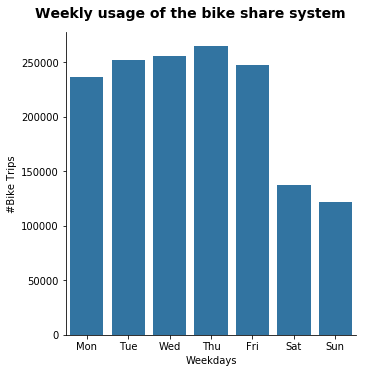

In [36]:
# weekday usege of the bike sharing system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

Thursday is the most demanded day of the week due to daily commute, and the weekend is the least demanded, especially for Sunday.

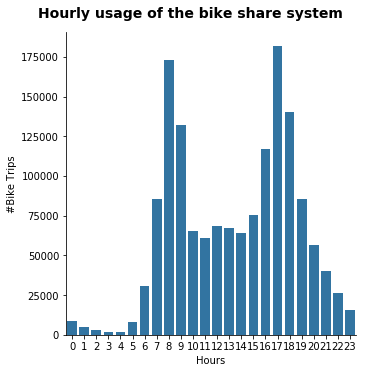

In [37]:
# hourly usege of the bike sharing system

g = sns.catplot(data=df_clean, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

The most used hours is 8-9am and 05-06pm when users commute to their school/work.

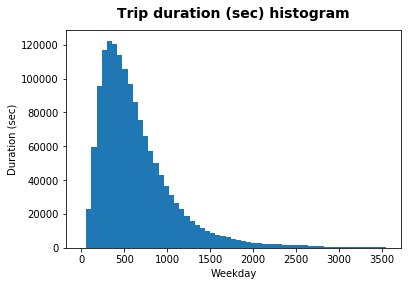

In [38]:
# code for the (histogram) duration (sec) distribution per user type

bin_edges = np.arange(0, 3600,60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');

The trip duration is less than 1800 seconds. In additions, 6 to 15 minutes are the most common duration. It is due to the extra $3 charges for additional 15 minutes, and also most of communte times takes only 5-15 minutes. 

### What is/are the main feature(s) of interest in your dataset?
The meain feature of the dataset are diverse variables that can be investigated such as gender, age, user type, trip duration, and more. It can be used to analyze the benefits and results of FordGo Bike system. 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The variables such as age group, user type, trip duraion, and more can help support my investigation. It will be analyzed to clarify the customers' behaviours.

# Part IV - Univariate Exploration
#### I will investigate the relationships between pairs of variables

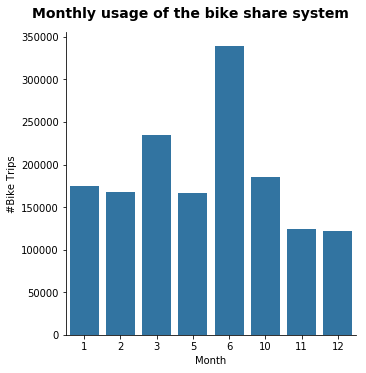

In [35]:
# monthly usege of the bike sharing system
g = sns.catplot(data=df_clean, x='start_time_month', kind='count', color = base_color)
g.set_axis_labels("Month", "#Bike Trips")
g.fig.suptitle('Monthly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

June is the highest demanded month, and december is the least demanded month due to weather conditions. 

In [50]:
#Generate new fields for date from start_time and end_time
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [51]:
df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date

In [52]:
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [53]:
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')

In [54]:
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)

In [55]:
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)

In [56]:
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))

In [57]:
count_of_rides = df.groupby('start_time_year_month_renamed')['bike_id'].size().reset_index()

In [58]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

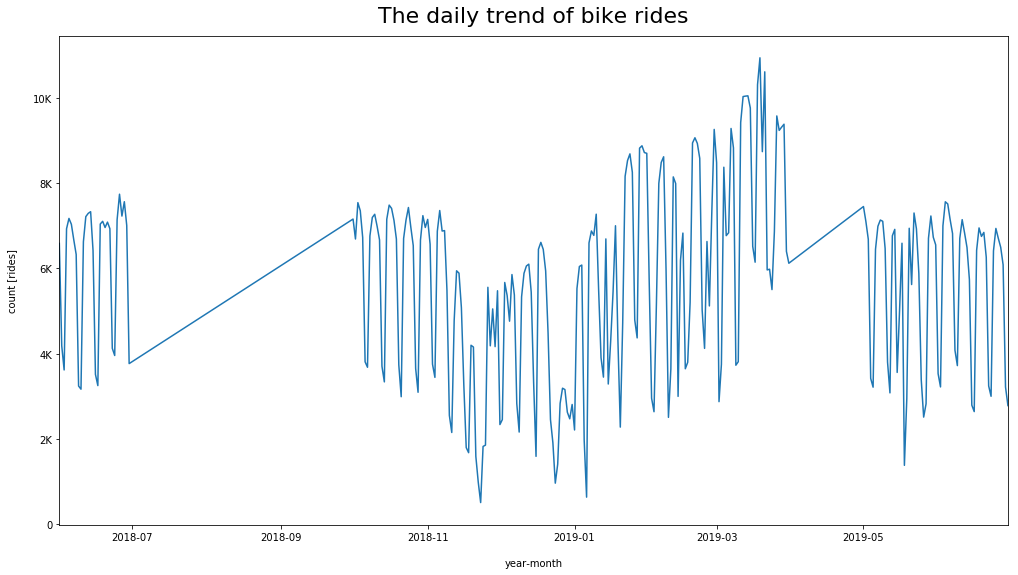

In [59]:

df.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(17,9))
plt.title('The daily trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image02.png');

From 2018-11 to 2019-01, there was a decreaes in the bike rides due to the weather, but the counts of rides has increased as the weather becomes warmer. 

#### Age group

In [70]:
df['bike_id'].sum()

4865370606

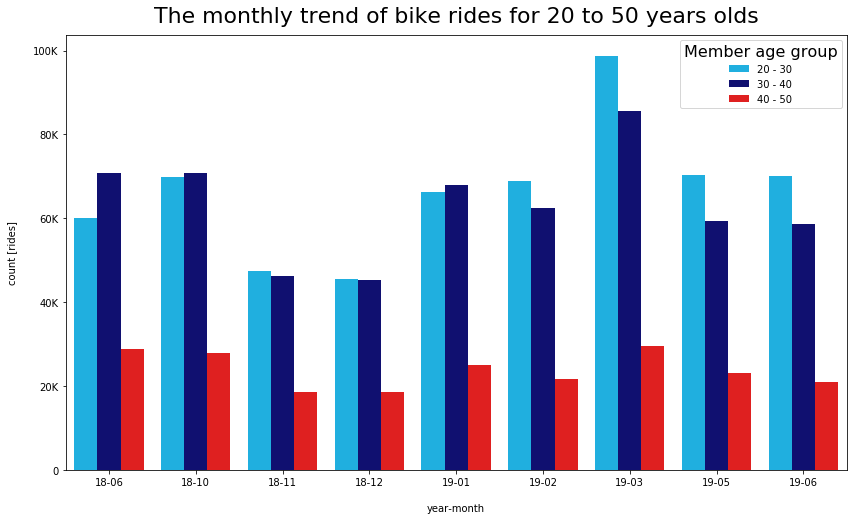

In [69]:
plt.figure(figsize=(14,8))
my_palette = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'red'}
ax = sns.countplot(x='start_time_year_month_renamed', hue='member_age_bins', palette=my_palette, data=df[df['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_year_month_renamed', 'member_age_bins']))
plt.title('The monthly trend of bike rides for 20 to 50 years olds', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image04.png');

The highest numbers of age group is 20-30, and the members aged between 40-50 has the least bike rdes.

### Bike rides per gender

In [74]:
trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})

In [75]:
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

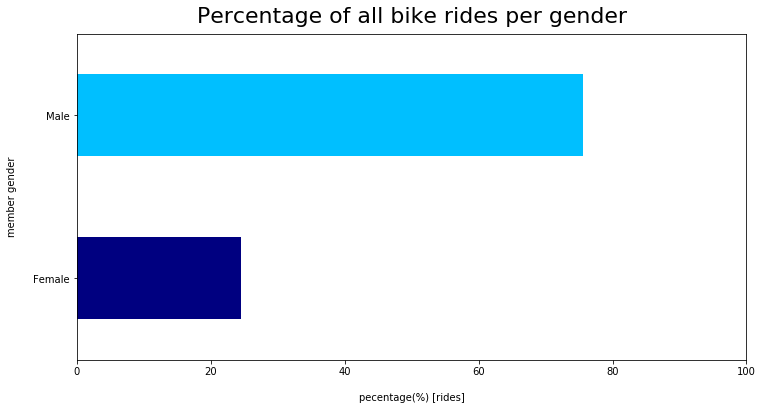

In [76]:
new_color = ['navy', 'deepskyblue', 'black']
trip_by_gender_df['perc'].plot(kind='barh', color=new_color, figsize=(12,6))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)
plt.savefig('image06.png');

More than 75% of users are male and about 25% users are female. 

### Bike rides per weekday

In [80]:
df['start_time_weekday']=df['start_time'].dt.weekday_name
df['end_time_weekday']=df['end_time'].dt.weekday_name

In [81]:
df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr']=df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [82]:
trip_by_weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})

In [83]:
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100

In [84]:
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

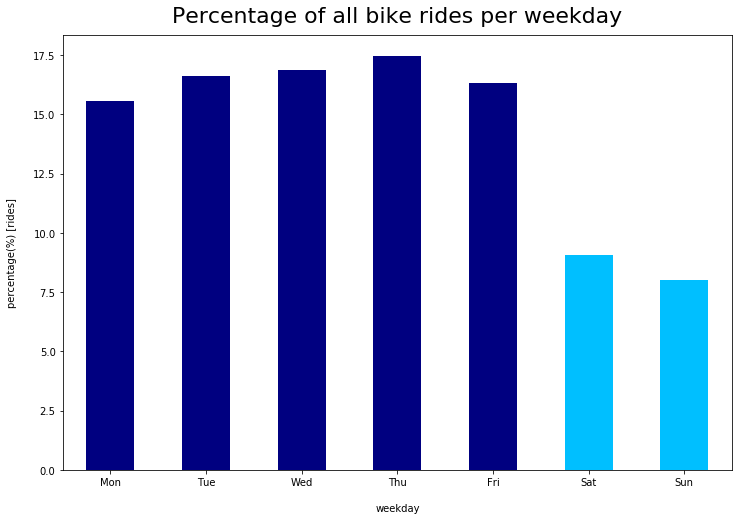

In [85]:
new_color = ['navy', 'navy', 'navy', 'navy', 'navy', 'deepskyblue', 'deepskyblue']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.savefig('image07.png');

Weekdays are more popular days for bike rides than weekends. Thursday is the most popular day of the week.

### Peak hours 

In [87]:
df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour

In [88]:
trip_by_hour_df = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

In [89]:
trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100

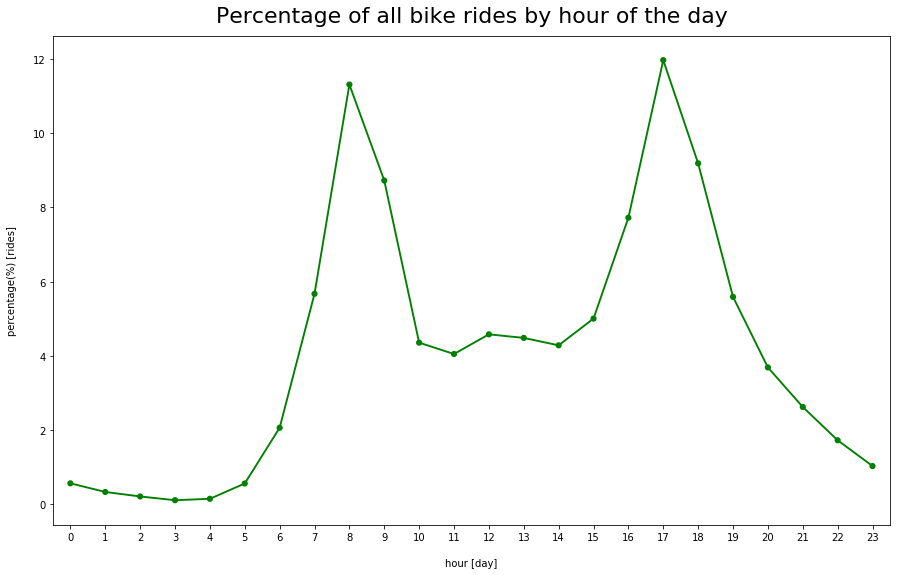

In [90]:
plt.figure(figsize=(15,9))
sns.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='green', data=trip_by_hour_df)
plt.title('Percentage of all bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.savefig('image08.png')

The peak hours are between 8-9am and 17-18pm due to commute. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
There are 4.8 billion rides, and 20-30 years old users are the dominant users among 20-30, 30-40, 40-50 aged users. About 75% users are male while the rest of percents are female uers. Weekdays are more pouplar days than weekends. Thursday is the most popular day of the week. 8-9 am and 17-18 pm are the peak hours due to commute. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest? 
I dropped the datas of people aged more than 60 since 95% of the users were under 60. So far every data seem normal. 

# Part VI - Bivariate Exploration
#### I will find the relationships between pairs of variables in the data

### Comparison between subscribers and customers

In [39]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

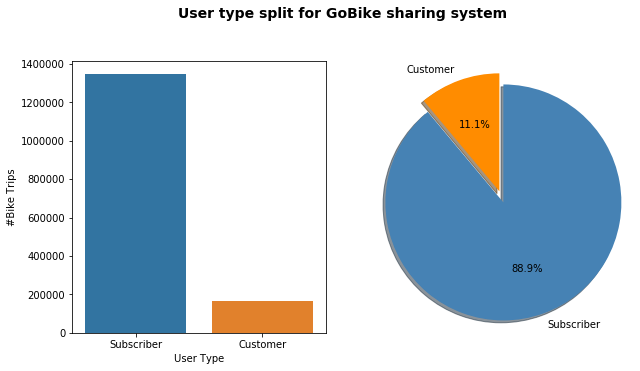

In [40]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

89% are subscribers while 11 % are customers, which means the most of GoBike users are subscribers.

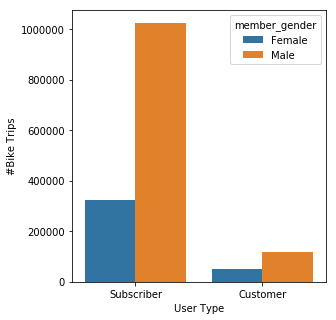

In [46]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

There are significantly higher male subscribers compared to female subscribers (3 times) while male customers are twice larger than female customers

Female takes longer trip duration than male for both of customers and subscribers.


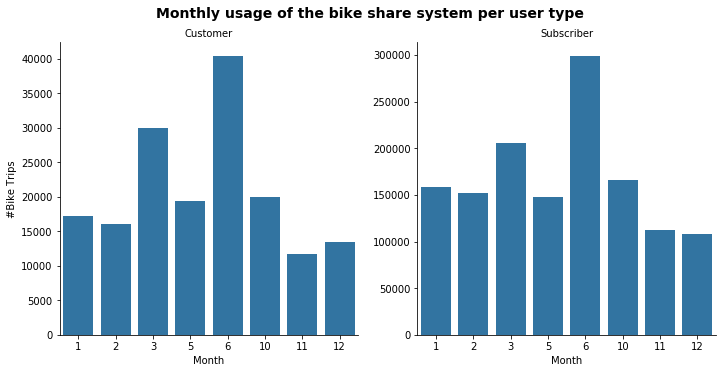

In [41]:
# monthly usege of the bike sharing system per user type
g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Month", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

June is the most popular month both for customers and subscribers. The least popular month is November and December due to the cold weather. Subsribers have higher use in winter compared to customers. 

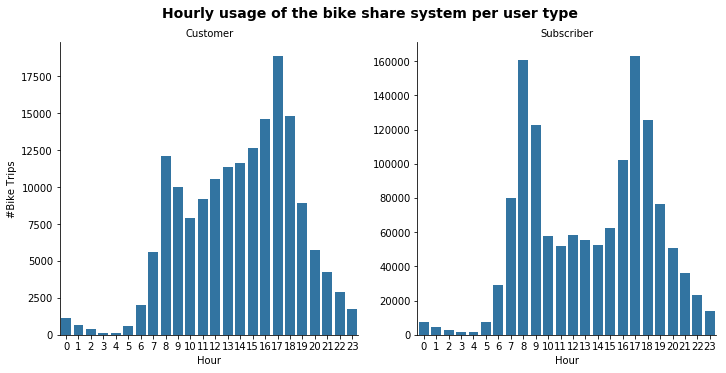

In [42]:
# hourly usege of the bike sharing system per user type

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

For subscribers, 8am-9am and 5pm-6pm are the most popular hours while customers have consistent high bike trips during the day. 

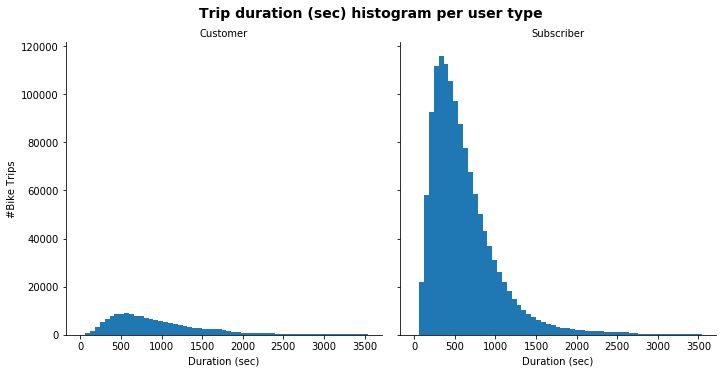

In [43]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

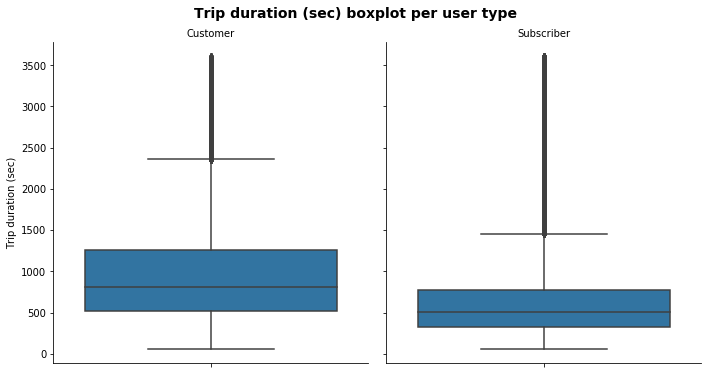

In [44]:
# code for the (boxplot) duration (sec) distribution per user type

data = df_clean.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

The trip duration for subscribers are less than customers based on the boxplot, which means subscribers use bikes for shorter destination compared to customers. 

In [95]:
#Generate new fields for distance
def distance(origin, destination):
    """
    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [96]:
df['distance_km_estimates'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
df['distance_miles_estimates'] = df['distance_km_estimates']*0.621371

Text(0.5, 0, 'miles [distance]')

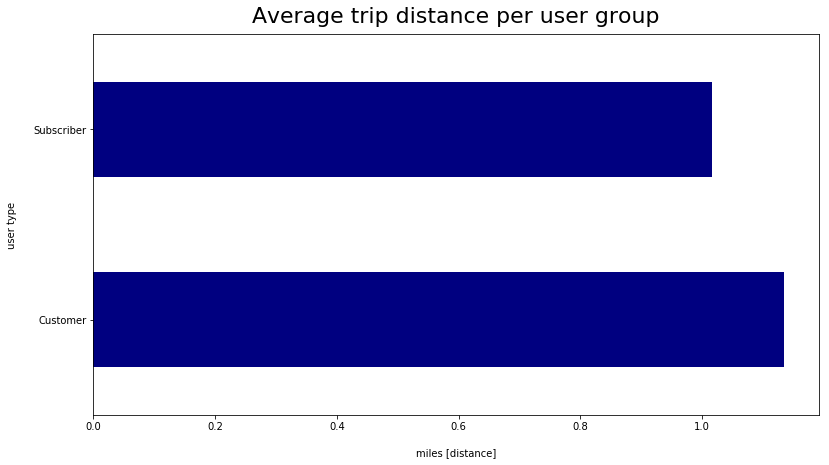

In [97]:
ax = df.groupby('user_type')['distance_miles_estimates'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip distance per user group', fontsize=22, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('miles [distance]', labelpad=16)

Customers use a bit more miles than subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
89% are subscribers while 11 % are customers, which means the most of GoBike users are subscribers. There are significantly higher male subscribers compared to female subscribers (3 times) while male customers are twice larger than female customers. Female users took more time for the trip duration than male users. Customers use a bit more trip distance (miles) than subscribers. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Subscribers use the bikerides for commute purpose, which makes less trip distance than customers. Customers use bikerides for other reasons than commute pupose, which makes longer trip duration than subscribers.

# Part VI - Multivariate Exploration
#### investigate more than three variables to understand the data

### Trip Duration and User type with gender

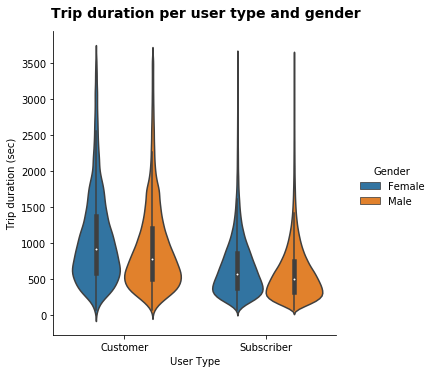

In [99]:
# code for the (violinplot) duration (sec) distribution per user type and gender

g = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

Both female users from customers and subscriers take longer trip duration than male users. 

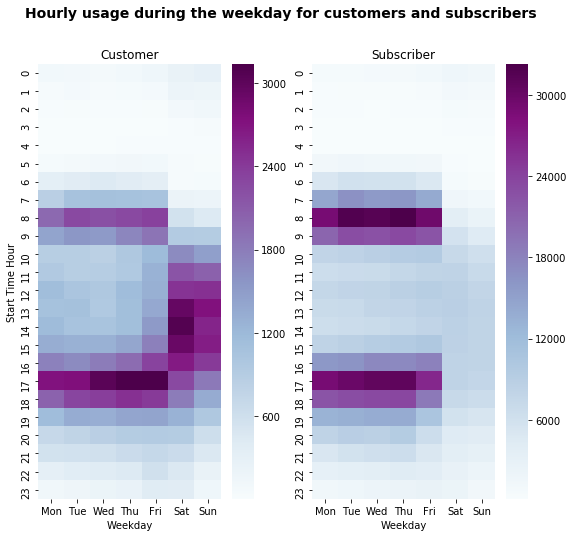

In [98]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The last data shows hourly usage during the weekday for customers and subscribers. It shows that customers not only use bikerides on the weekday but also weekend. It is because customers use the system not only for commute reason but also for tourism. Both female users from customers and subscriers take longer trip duration than male users. 

### Were there any interesting or surprising interactions between features?
Nothing unexepcted data appeared. The interesting part was that there are more male users than female users.

### Summary
Subscribers and customers benefit from lifestyle friendly method of commuting to works/school/other places. Most of them use it less than 1800 seconds since there is an extra 3 dollars charge after 15 minutes. 89% are subscribers while 11% are customers, which means that subscribers are the primarily clients and they use it more often for short commute distance on the weekdays at 8 to 9am and 5 to 6pm. June is the most popular month both for customers and subscribers. The least popular month is November and December due to the cold weather. Subsribers have higher use in winter compared to customers. 